#Auto Encoders for Image Compression


#Gray 28x28 Image Compression Steps:

Please Note That this is followed from Tensorflow's Auto Encoder Documentation (More info at: https://www.tensorflow.org/tutorials/generative/autoencoder)


Step-1: Imports

Step-2: Load Dataset

Step-3: Prepare Data

Step-4: Build AutoEncoder Model

Step-5: Train AutoEncoder

Step-6: Save AutoEncoder

Step-7: Load AutoEncoder Model

Step-8: Decode Function

Step-9: Visualize Results

Step-10: Compare byte sizes

## Imports

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [5]:
import os
import numpy as np
import cv2

## Load Dataset

In [142]:
def load_data(img_dir):
  x_train = []
  image_paths = [os.path.join(img_dir,w) for w in os.listdir(img_dir) if w.endswith(".png")]
  for image_path in image_paths:
    x_train.append(cv2.imread(image_path, 0))
  return np.array(x_train)

In [ ]:
%%shell
unzip resized_28x28_gray.zip

In [143]:
data = load_data("./resized_28x28_gray")

## Prepare Data

In [144]:
data = data.astype('float32') / 255.
x_train = data[:65000]
x_test = data[65000:]
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]
print(type(x_train[0]))
print (x_train.shape)
print (x_test.shape)

<class 'numpy.ndarray'>
(65000, 28, 28, 1)
(5000, 28, 28, 1)


In [156]:
x_test.shape

(5000, 28, 28, 1)

## Create AutoEncoder Model

In [179]:
class ConvAutoEncoder(Model):
  def __init__(self):
    super(ConvAutoEncoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)), 
      layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)])
    
    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = ConvAutoEncoder()

In [180]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [190]:
autoencoder.encoder.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 8)           1160      
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


In [191]:
autoencoder.decoder.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose_8 (Conv2DTr (None, 14, 14, 8)         584       
_________________________________________________________________
conv2d_transpose_9 (Conv2DTr (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 1)         145       
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


## Train AutoEncoder

In [182]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
2032/2032 [==============================] - 7s 3ms/step - loss: 0.0092 - val_loss: 0.0056
Epoch 2/10
2032/2032 [==============================] - 6s 3ms/step - loss: 0.0049 - val_loss: 0.0046
Epoch 3/10
2032/2032 [==============================] - 6s 3ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 4/10
2032/2032 [==============================] - 6s 3ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 5/10
2032/2032 [==============================] - 6s 3ms/step - loss: 0.0042 - val_loss: 0.0043
Epoch 6/10
2032/2032 [==============================] - 6s 3ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 7/10
2032/2032 [==============================] - 6s 3ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 8/10
2032/2032 [==============================] - 6s 3ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 9/10
2032/2032 [==============================] - 6s 3ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 10/10
2032/2032 [==============================] - 6s 3ms/step - loss: 0.004

##Save AutoEncoder Model

In [ ]:
autoencoder.save("./autoencoder_model_28x28_gray")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./autoencoder_model_28x28_gray/assets


## Load AutoEncoder Model

In [ ]:
autoencoder = tf.keras.models.load_model('./autoencoder_model_28x28_gray/')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 64)                50240     
_________________________________________________________________
sequential_1 (Sequential)    (None, 28, 28)            50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


## Test AutoEncoder Model

In [183]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

## Visualize Results

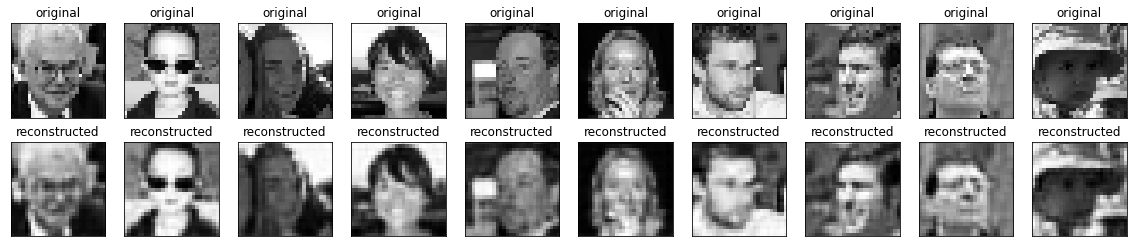

In [184]:
n = 10
skip=0
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(tf.squeeze(x_test[skip+i]))
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(tf.squeeze(decoded_imgs[skip+i]))
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

## Compare sizes


In [174]:
import sys

In [185]:
x_test.nbytes

15680000

In [186]:
encoded_imgs.nbytes

7840000

In [187]:
x_test.nbytes/encoded_imgs.nbytes

2.0